<h1>1. Environment Setup</h1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from ucimlrepo import fetch_ucirepo 

# Evaluation & Preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, matthews_corrcoef, 
                             confusion_matrix, classification_report, roc_curve)

# Set display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.float_format', '{:.3f}'.format)

warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12
sns.set_theme(style="whitegrid", palette="viridis")

print("=" * 70)
print("INITIALIZATION COMPLETE")
print("=" * 70)
print(f"✅ Libraries imported successfully")
print(f"✅ Matplotlib backend configured for inline display")
print(f"✅ Pandas display options set for better readability")
print(f"✅ Warnings filtered for cleaner output")
print("=" * 70)
print("\nAvailable libraries and versions:")
print(f"- Pandas: {pd.__version__}")
print(f"- NumPy: {np.__version__}")
print(f"- Scikit-learn: available")
print(f"- XGBoost: available")
print("\n" + "=" * 70)
print("READY FOR DATA LOADING AND PREPROCESSING")
print("=" * 70)

INITIALIZATION COMPLETE
✅ Libraries imported successfully
✅ Matplotlib backend configured for inline display
✅ Pandas display options set for better readability
✅ Warnings filtered for cleaner output

Available libraries and versions:
- Pandas: 2.3.3
- NumPy: 2.3.5
- Scikit-learn: available
- XGBoost: available

READY FOR DATA LOADING AND PREPROCESSING


<h1>2. Data Loading</h1>

In [2]:
# Fetch dataset 
print("=" * 70)
print("FETCHING BANK MARKETING DATASET FROM UCI REPOSITORY")
print("=" * 70)

bank_marketing = fetch_ucirepo(id=222) 

# Extract the full dataframe for EDA
df = bank_marketing.data.original 

print(f"✅ Dataset successfully loaded!")
print(f"📊 Shape: {df.shape[0]} instances × {df.shape[1]} features")
print(f"📋 Features: {', '.join(df.columns.tolist())}")
print("=" * 70)

# Display dataset overview
print("\n📈 DATASET OVERVIEW:")
print("=" * 50)

# Basic info
print("\n BASIC INFORMATION:")
df_info = pd.DataFrame({
    'Data Type': df.dtypes,
    'Non-Null Count': df.count(),
    'Null Count': df.isnull().sum(),
    'Unique Values': df.nunique()
})
print(df_info)

print("\n" + "=" * 50)
print("FIRST 10 ROWS OF THE DATASET:")
print("=" * 50)

# Create a style that adapts to theme backgrounds
styled_df = df.head(10).style.set_table_styles([
    # Header styling: Dark slate blue/gray works well for both
    {'selector': 'th', 'props': [
        ('background-color', '#4a5568'), 
        ('color', '#ffffff'), 
        ('font-weight', 'bold'),
        ('text-align', 'center'),
        ('border', '1px solid #718096')
    ]},
    # Body cell styling: Use 'inherit' for background so it matches the theme
    {'selector': 'td', 'props': [
        ('text-align', 'center'),
        ('border', '1px solid #718096'),
        ('padding', '8px')
    ]},
    # Subtle hover effect that works in light/dark
    {'selector': 'tr:hover', 'props': [('background-color', 'rgba(100, 149, 237, 0.2)')]}
]).set_properties(**{
    'background-color': 'transparent', # Allows the theme background to show
})

display(styled_df)

FETCHING BANK MARKETING DATASET FROM UCI REPOSITORY
✅ Dataset successfully loaded!
📊 Shape: 45211 instances × 17 features
📋 Features: age, job, marital, education, default, balance, housing, loan, contact, day_of_week, month, duration, campaign, pdays, previous, poutcome, y

📈 DATASET OVERVIEW:

 BASIC INFORMATION:
            Data Type  Non-Null Count  Null Count  Unique Values
age             int64           45211           0             77
job            object           44923         288             11
marital        object           45211           0              3
education      object           43354        1857              3
default        object           45211           0              2
balance         int64           45211           0           7168
housing        object           45211           0              2
loan           object           45211           0              2
contact        object           32191       13020              2
day_of_week     int64           4

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,nan,5,may,261,1,-1,0,nan,no
1,44,technician,single,secondary,no,29,yes,no,nan,5,may,151,1,-1,0,nan,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,nan,5,may,76,1,-1,0,nan,no
3,47,blue-collar,married,nan,no,1506,yes,no,nan,5,may,92,1,-1,0,nan,no
4,33,nan,single,nan,no,1,no,no,nan,5,may,198,1,-1,0,nan,no
5,35,management,married,tertiary,no,231,yes,no,nan,5,may,139,1,-1,0,nan,no
6,28,management,single,tertiary,no,447,yes,yes,nan,5,may,217,1,-1,0,nan,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,nan,5,may,380,1,-1,0,nan,no
8,58,retired,married,primary,no,121,yes,no,nan,5,may,50,1,-1,0,nan,no
9,43,technician,single,secondary,no,593,yes,no,nan,5,may,55,1,-1,0,nan,no


<h1>2. Exploratory Data Analysis (EDA)</h1>

<h2>2.1 TARGET VARIABLE DISTRIBUTION:</h2>


TARGET VARIABLE DISTRIBUTION:
     Count  Percentage
y                     
no   39922      88.300
yes   5289      11.700


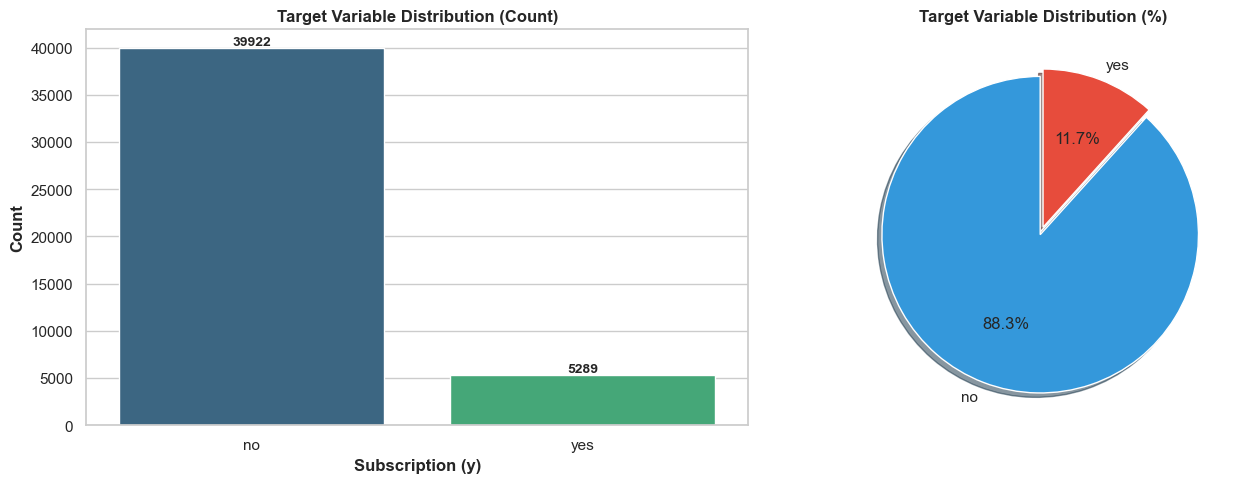


⚠️  Class Imbalance Ratio (Majority:Minority): 7.55:1
⚠️  Note: Significant class imbalance detected. Consider using:
   - Class weights in models
   - SMOTE/oversampling techniques
   - Appropriate metrics (AUC, F1, MCC instead of just accuracy)


In [3]:
print("\n" + "=" * 50)
print("TARGET VARIABLE DISTRIBUTION:")
print("=" * 50)

# Analyze target variable
target_col = 'y'  # Based on UCI dataset documentation
if target_col in df.columns:
    target_dist = df[target_col].value_counts()
    target_percent = df[target_col].value_counts(normalize=True) * 100
    
    target_summary = pd.DataFrame({
        'Count': target_dist,
        'Percentage': target_percent.round(2)
    })
    print(target_summary)
    
    # Visualize target distribution
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    bars = sns.countplot(data=df, x=target_col, ax=ax1, palette='viridis')
    ax1.set_title('Target Variable Distribution (Count)', fontweight='bold')
    ax1.set_xlabel('Subscription (y)', fontweight='bold')
    ax1.set_ylabel('Count', fontweight='bold')
    
    # Add count labels on bars
    for container in bars.containers:
        bars.bar_label(container, fontsize=10, fontweight='bold')
    
    # Pie chart
    colors = ['#3498db', '#e74c3c']
    ax2.pie(target_summary['Count'], labels=target_summary.index, 
            autopct='%1.1f%%', startangle=90, colors=colors,
            explode=(0.05, 0), shadow=True)
    ax2.set_title('Target Variable Distribution (%)', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Check for class imbalance
    imbalance_ratio = target_summary['Percentage'].iloc[0] / target_summary['Percentage'].iloc[1]
    print(f"\n⚠️  Class Imbalance Ratio (Majority:Minority): {imbalance_ratio:.2f}:1")
    if imbalance_ratio > 4:
        print("⚠️  Note: Significant class imbalance detected. Consider using:")
        print("   - Class weights in models")
        print("   - SMOTE/oversampling techniques")
        print("   - Appropriate metrics (AUC, F1, MCC instead of just accuracy)")
else:
    print(f"⚠️  Warning: Target column '{target_col}' not found in dataset.")
    print("Available columns:", df.columns.tolist())



<h2>2.2 STATISTICAL SUMMARY OF NUMERICAL FEATURES:</h2>


STATISTICAL SUMMARY OF NUMERICAL FEATURES:
📈 Numerical Features (7): ['age', 'balance', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous']
📊 Categorical Features (10): ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']

Statistical Summary:
                count     mean      std       min     25%     50%      75%        max
age         45211.000   40.940   10.620    18.000  33.000  39.000   48.000     95.000
balance     45211.000 1362.270 3044.770 -8019.000  72.000 448.000 1428.000 102127.000
day_of_week 45211.000   15.810    8.320     1.000   8.000  16.000   21.000     31.000
duration    45211.000  258.160  257.530     0.000 103.000 180.000  319.000   4918.000
campaign    45211.000    2.760    3.100     1.000   1.000   2.000    3.000     63.000
pdays       45211.000   40.200  100.130    -1.000  -1.000  -1.000   -1.000    871.000
previous    45211.000    0.580    2.300     0.000   0.000   0.000    0.000    275.000


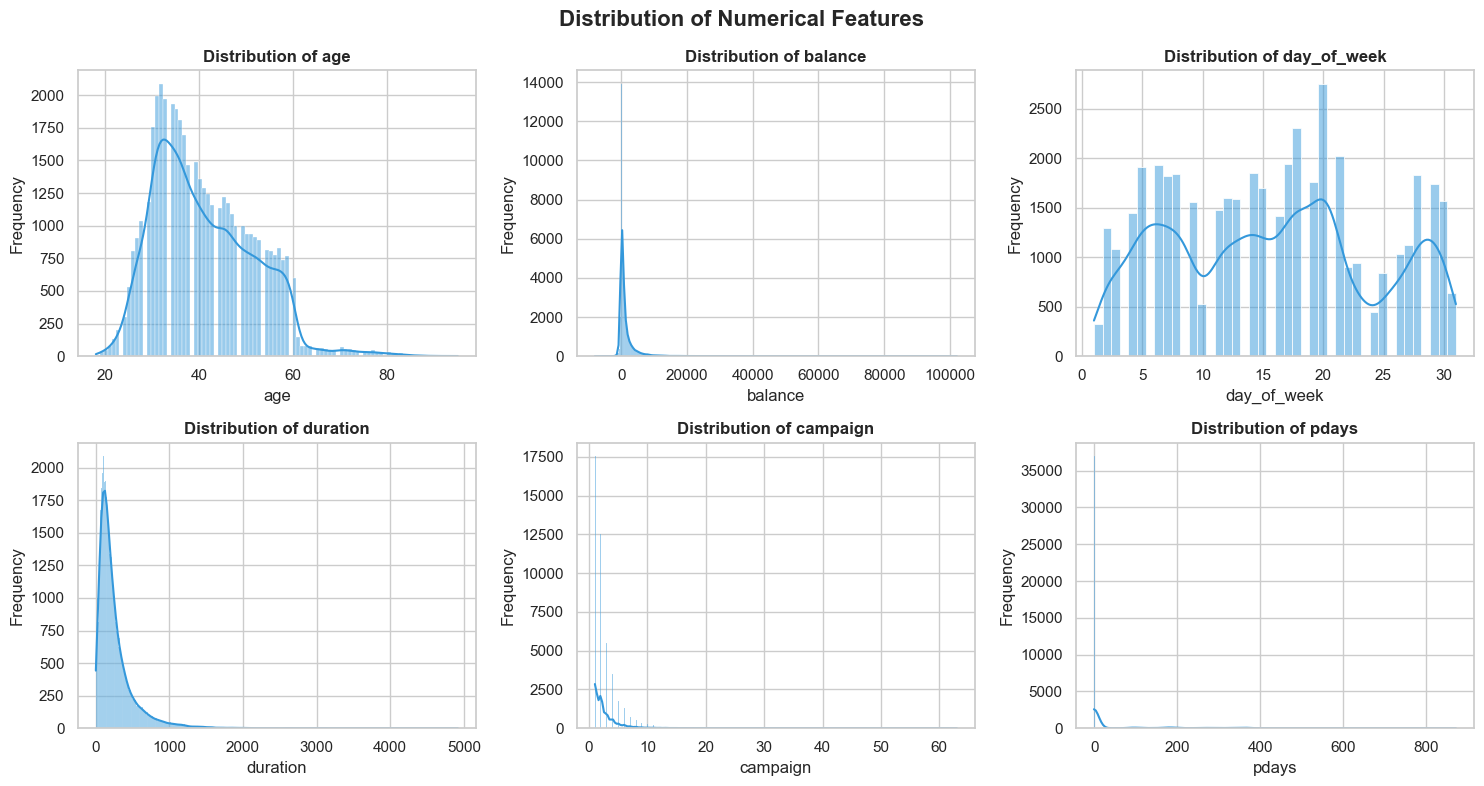


DATASET LOADING AND INITIAL EDA COMPLETE


In [4]:
print("\n" + "=" * 50)
print("STATISTICAL SUMMARY OF NUMERICAL FEATURES:")
print("=" * 50)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()

print(f"📈 Numerical Features ({len(numerical_cols)}): {numerical_cols}")
print(f"📊 Categorical Features ({len(categorical_cols)}): {categorical_cols}")

if numerical_cols:
    print("\nStatistical Summary:")
    print(df[numerical_cols].describe().T.round(2))
    
    # Visualize numerical features distribution
    if len(numerical_cols) > 0:
        fig, axes = plt.subplots(2, 3, figsize=(15, 8))
        axes = axes.flatten()
        
        for idx, col in enumerate(numerical_cols[:6]):  # Show first 6 numerical features
            if idx < len(axes):
                sns.histplot(data=df, x=col, kde=True, ax=axes[idx], color='#3498db')
                axes[idx].set_title(f'Distribution of {col}', fontweight='bold')
                axes[idx].set_xlabel(col)
                axes[idx].set_ylabel('Frequency')
        
        # Hide unused subplots
        for idx in range(len(numerical_cols[:6]), len(axes)):
            axes[idx].set_visible(False)
        
        plt.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()

print("\n" + "=" * 70)
print("DATASET LOADING AND INITIAL EDA COMPLETE")
print("=" * 70)

<h1>3. Data Pre-processing</h1>

<h2>3.1 HANDLE MISSING VALUES</h2>

HANDLE MISSING VALUES
🔍 Checking for missing values...
⚠️  Found 4 columns with missing values:
           Missing Values  Percentage (%)
job                   288           0.640
education            1857           4.110
contact             13020          28.800
poutcome            36959          81.750


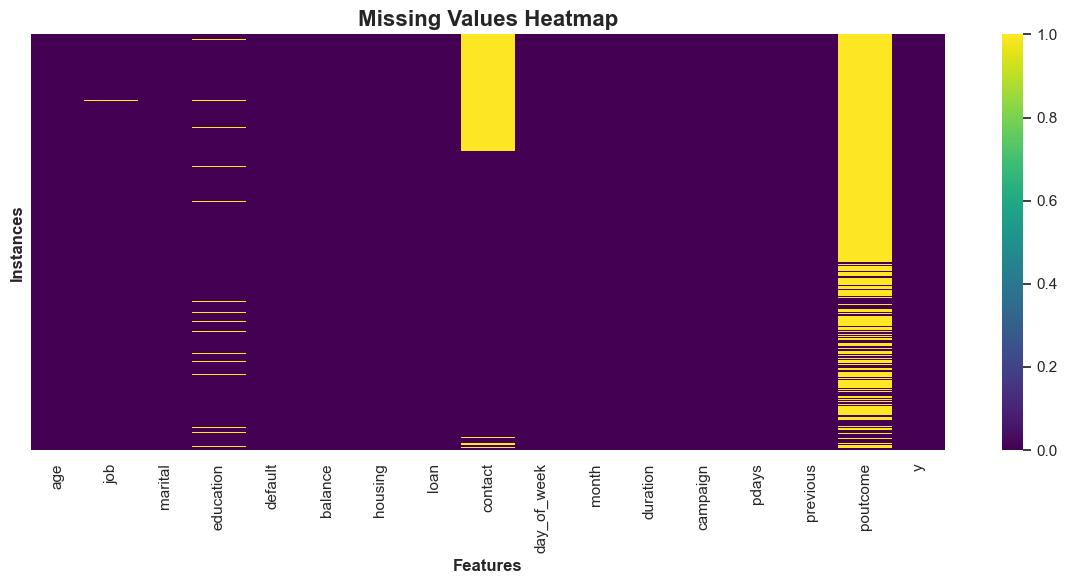


🛠️  Handling missing values...
   • job: Filled 288 missing values with mode 'blue-collar'
   • education: Filled 1857 missing values with mode 'secondary'
   • contact: Filled 13020 missing values with mode 'cellular'
   • poutcome: Filled 36959 missing values with mode 'failure'



In [5]:
print("=" * 70)
print("HANDLE MISSING VALUES")
print("=" * 70)

# Check for missing values
print("🔍 Checking for missing values...")
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_data,
    'Percentage (%)': missing_percentage.round(2)
})

# Filter to show only columns with missing values
missing_cols = missing_summary[missing_summary['Missing Values'] > 0]

if len(missing_cols) > 0:
    print(f"⚠️  Found {len(missing_cols)} columns with missing values:")
    print(missing_cols)
    
    # Visualize missing values
    plt.figure(figsize=(12, 6))
    missing_plot = sns.heatmap(df.isnull(), yticklabels=False, cbar=True, cmap='viridis')
    plt.title('Missing Values Heatmap', fontsize=16, fontweight='bold')
    plt.xlabel('Features', fontweight='bold')
    plt.ylabel('Instances', fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Handle missing values based on data type
    print("\n🛠️  Handling missing values...")
    
    for col in missing_cols.index:
        if df[col].dtype == 'object':  # Categorical
            mode_val = df[col].mode()[0]
            df[col].fillna(mode_val, inplace=True)
            print(f"   • {col}: Filled {missing_summary.loc[col, 'Missing Values']} missing values with mode '{mode_val}'")
        else:  # Numerical
            median_val = df[col].median()
            df[col].fillna(median_val, inplace=True)
            print(f"   • {col}: Filled {missing_summary.loc[col, 'Missing Values']} missing values with median {median_val:.2f}")
else:
    print("✅ No missing values found in the dataset!")

print("\n" + "=" * 70)


<h2>3.2 ENCODE CATEGORICAL VARIABLES</h2>

ENCODE CATEGORICAL VARIABLES
✅ Target variable 'y' will be encoded separately
📊 Found 9 categorical features:
   1. job: 11 unique values
   2. marital: 3 unique values
   3. education: 3 unique values
   4. default: 2 unique values
   5. housing: 2 unique values
   6. loan: 2 unique values
   7. contact: 2 unique values
   8. month: 12 unique values
   9. poutcome: 3 unique values

📈 Categorical Features Distribution:

   job:
      • blue-collar: 10020 (22.2%)
      • management: 9458 (20.9%)
      • technician: 7597 (16.8%)
      • admin.: 5171 (11.4%)
      • services: 4154 (9.2%)
      • retired: 2264 (5.0%)
      • self-employed: 1579 (3.5%)
      • entrepreneur: 1487 (3.3%)
      • unemployed: 1303 (2.9%)
      • housemaid: 1240 (2.7%)

   marital:
      • married: 27214 (60.2%)
      • single: 12790 (28.3%)
      • divorced: 5207 (11.5%)

   education:
      • secondary: 25059 (55.4%)
      • tertiary: 13301 (29.4%)
      • primary: 6851 (15.2%)

   default:
      • no: 44396 (

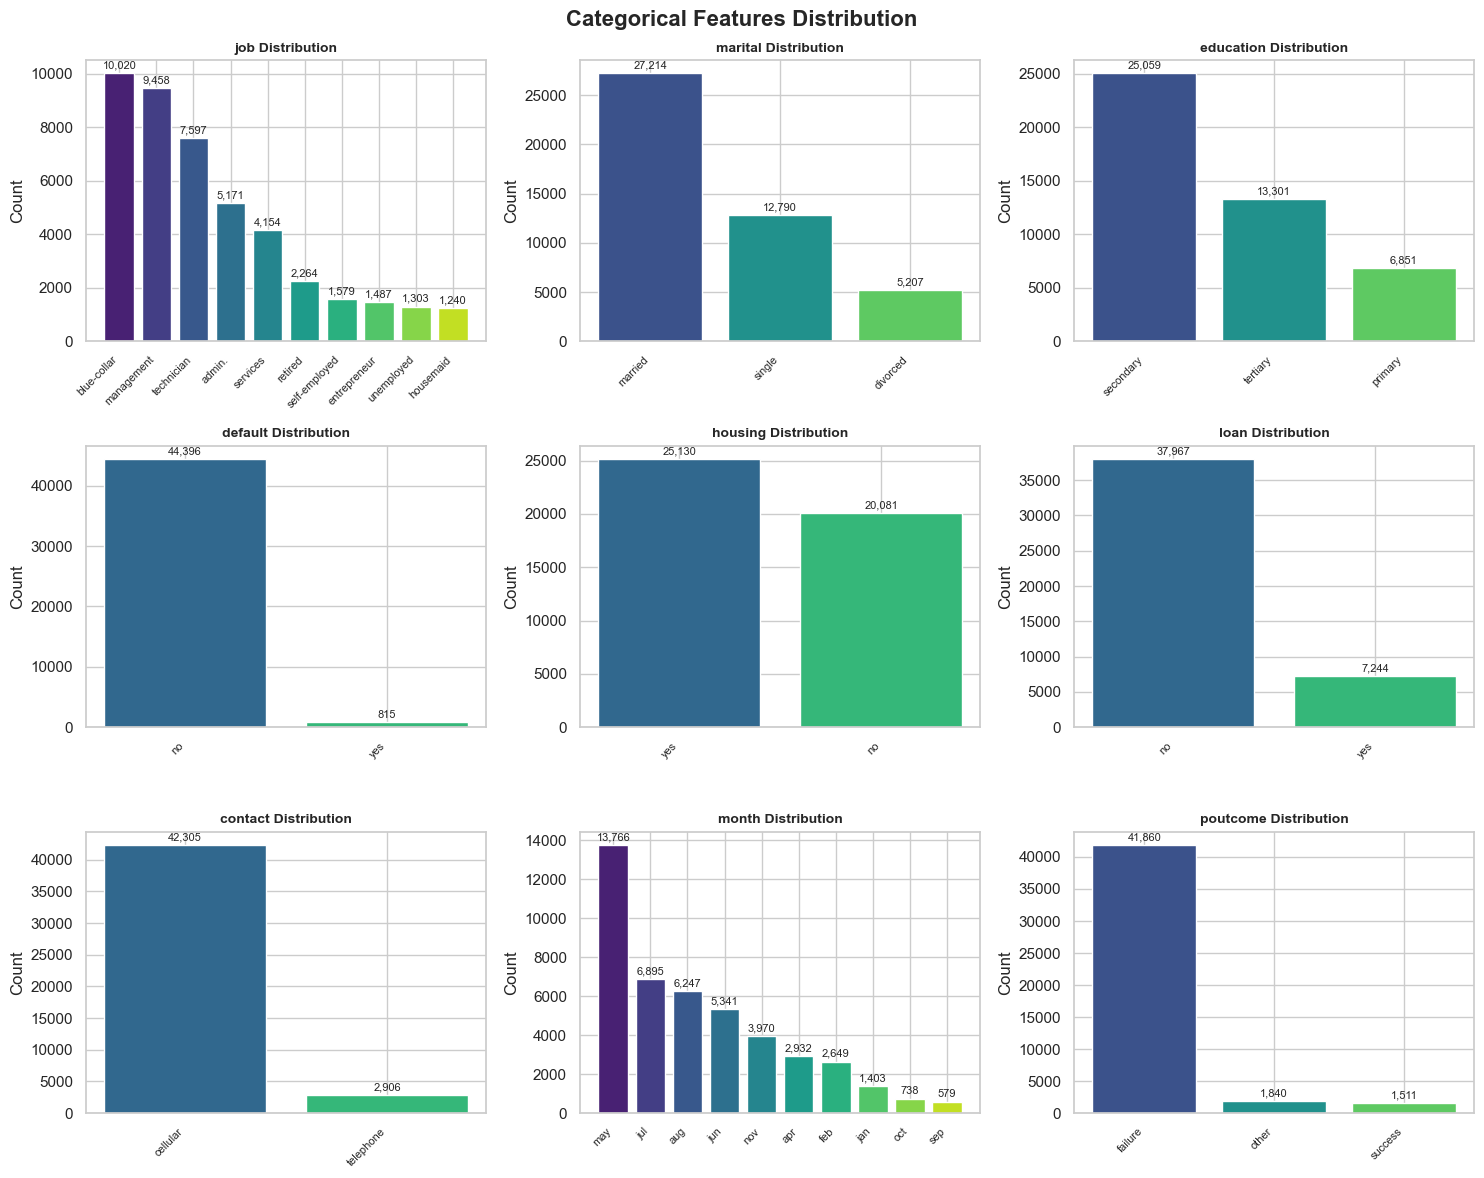


🔧 Encoding categorical variables...
✅ Encoding completed!
   • Original shape: (45211, 17)
   • After encoding: (45211, 39)
   • Added 22 new columns through one-hot encoding


In [6]:
print("ENCODE CATEGORICAL VARIABLES")
print("=" * 70)

# Identify categorical columns (excluding target if it's categorical)
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

if 'y' in categorical_cols:
    categorical_cols.remove('y')  # We'll handle target separately
    print(f"✅ Target variable 'y' will be encoded separately")

print(f"📊 Found {len(categorical_cols)} categorical features:")
for i, col in enumerate(categorical_cols, 1):
    unique_vals = df[col].nunique()
    print(f"   {i}. {col}: {unique_vals} unique values")

print("\n📈 Categorical Features Distribution:")
for col in categorical_cols[:5]:  # Show first 5 for brevity
    print(f"\n   {col}:")
    value_counts = df[col].value_counts().head(10)  # Top 10 values
    for val, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"      • {val}: {count} ({percentage:.1f}%)")

# Create visualizations for categorical features
if categorical_cols:
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()
    
    for idx, col in enumerate(categorical_cols[:9]):  # Show first 9
        if idx < len(axes):
            # Get top 10 categories
            top_categories = df[col].value_counts().head(10)
            
            # Create bar plot
            bars = axes[idx].bar(range(len(top_categories)), top_categories.values, 
                                color=sns.color_palette("viridis", len(top_categories)))
            axes[idx].set_title(f'{col} Distribution', fontweight='bold', fontsize=10)
            axes[idx].set_xlabel('')
            axes[idx].set_ylabel('Count')
            axes[idx].set_xticks(range(len(top_categories)))
            axes[idx].set_xticklabels(top_categories.index, rotation=45, ha='right', fontsize=8)
            
            # Add count labels
            for bar, count in zip(bars, top_categories.values):
                height = bar.get_height()
                axes[idx].text(bar.get_x() + bar.get_width()/2, height + 0.01*max(top_categories.values),
                              f'{count:,}', ha='center', va='bottom', fontsize=8)
    
    # Hide unused subplots
    for idx in range(len(categorical_cols[:9]), len(axes)):
        axes[idx].set_visible(False)
    
    plt.suptitle('Categorical Features Distribution', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

print("\n🔧 Encoding categorical variables...")
# Create a copy for encoding
df_encoded = df.copy()

# One-hot encode categorical variables (excluding target)
df_encoded = pd.get_dummies(df_encoded, columns=categorical_cols, drop_first=True)

# Encode target variable
target_mapping = {'no': 0, 'yes': 1}
df_encoded['y'] = df_encoded['y'].map(target_mapping)

print(f"✅ Encoding completed!")
print(f"   • Original shape: {df.shape}")
print(f"   • After encoding: {df_encoded.shape}")
print(f"   • Added {df_encoded.shape[1] - df.shape[1]} new columns through one-hot encoding")



In [7]:
print("\n" + "=" * 70)
print("FEATURE ENGINEERING")
print("=" * 70)

print("🛠️  Creating new features...")

# Create some potential meaningful features (based on domain knowledge)
# Note: These are examples - you should adjust based on your understanding of banking

# 1. Age groups
df_encoded['age_group'] = pd.cut(df_encoded['age'], 
                                 bins=[0, 30, 40, 50, 60, 100],
                                 labels=['<30', '30-40', '40-50', '50-60', '60+'])

# 2. Balance categories
df_encoded['balance_category'] = pd.cut(df_encoded['balance'],
                                        bins=[-float('inf'), 0, 1000, 5000, float('inf')],
                                        labels=['negative', 'low', 'medium', 'high'])

# 3. Campaign interaction rate (calls per duration)
df_encoded['campaign_intensity'] = df_encoded['campaign'] / (df_encoded['duration'] + 1)

# 4. Previous success indicator
df_encoded['previous_success_ratio'] = df_encoded['pdays'].apply(
    lambda x: 1 if x == 999 else 0  # 999 means not previously contacted
)

print(f"✅ Created {4} new engineered features:")
print("   1. age_group (categorical age ranges)")
print("   2. balance_category (balance level categories)")
print("   3. campaign_intensity (calls per duration)")
print("   4. previous_success_ratio (previous contact success indicator)")

# Convert new categorical features to one-hot
new_categorical = ['age_group', 'balance_category']
df_encoded = pd.get_dummies(df_encoded, columns=new_categorical, drop_first=True)

print(f"📊 Final dataset shape after feature engineering: {df_encoded.shape}")




FEATURE ENGINEERING
🛠️  Creating new features...
✅ Created 4 new engineered features:
   1. age_group (categorical age ranges)
   2. balance_category (balance level categories)
   3. campaign_intensity (calls per duration)
   4. previous_success_ratio (previous contact success indicator)
📊 Final dataset shape after feature engineering: (45211, 48)



TRAIN-TEST SPLIT
📈 Dataset split:
   • Total samples: 45,211
   • Features: 47
   • Target distribution:
        - Class 0 (No): 39,922 (88.3%)
        - Class 1 (Yes): 5,289 (11.7%)

✅ Train-Test Split completed:
   • Training set: 36,168 samples (80.0%)
   • Testing set: 9,043 samples (20.0%)

📊 Class distribution in splits:
   Train Count  Train %  Test Count  Test %
y                                          
0        31937   88.300        7985  88.300
1         4231   11.700        1058  11.700


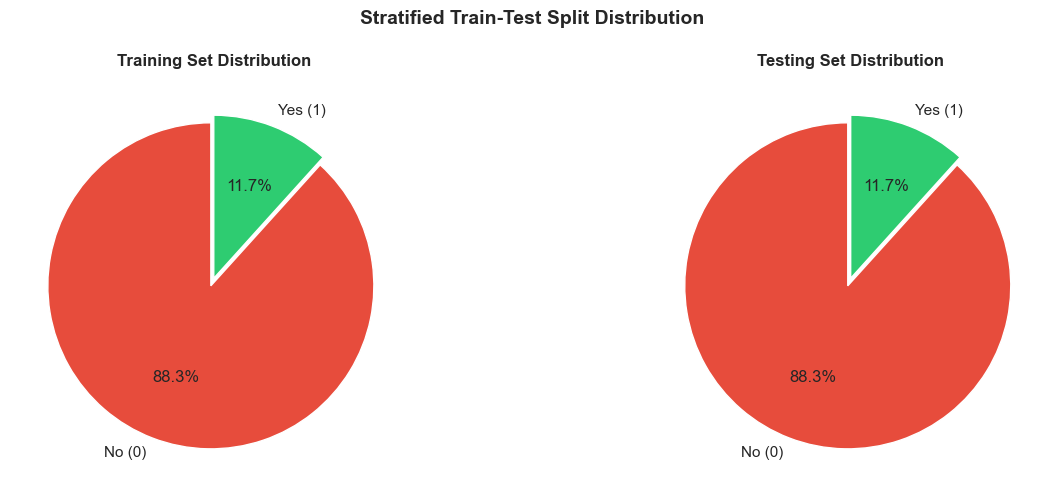



💾 Preprocessed data is ready for modeling.
   Feature names saved: 47 features


In [8]:
print("\n" + "=" * 70)
print("TRAIN-TEST SPLIT")
print("=" * 70)

# Separate features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

print(f"📈 Dataset split:")
print(f"   • Total samples: {len(X):,}")
print(f"   • Features: {X.shape[1]}")
print(f"   • Target distribution:")
print(f"        - Class 0 (No): {(y == 0).sum():,} ({(y == 0).sum()/len(y)*100:.1f}%)")
print(f"        - Class 1 (Yes): {(y == 1).sum():,} ({(y == 1).sum()/len(y)*100:.1f}%)")

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  # Preserve class distribution
)

print(f"\n✅ Train-Test Split completed:")
print(f"   • Training set: {X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"   • Testing set: {X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)")

# Check class distribution in splits
print(f"\n📊 Class distribution in splits:")

train_dist = pd.DataFrame({
    'Train Count': y_train.value_counts(),
    'Train %': (y_train.value_counts() / len(y_train) * 100).round(2)
})
test_dist = pd.DataFrame({
    'Test Count': y_test.value_counts(),
    'Test %': (y_test.value_counts() / len(y_test) * 100).round(2)
})

distribution_table = pd.concat([train_dist, test_dist], axis=1)
print(distribution_table)

# Visualize the split
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Train set distribution
train_counts = y_train.value_counts()
ax1.pie(train_counts, labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%',
        colors=['#e74c3c', '#2ecc71'], startangle=90, explode=(0.05, 0))
ax1.set_title('Training Set Distribution', fontweight='bold')

# Test set distribution
test_counts = y_test.value_counts()
ax2.pie(test_counts, labels=['No (0)', 'Yes (1)'], autopct='%1.1f%%',
        colors=['#e74c3c', '#2ecc71'], startangle=90, explode=(0.05, 0))
ax2.set_title('Testing Set Distribution', fontweight='bold')

plt.suptitle('Stratified Train-Test Split Distribution', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)


# Save preprocessed data for reference
preprocessed_data = {
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'feature_names': X.columns.tolist()
}

print(f"\n💾 Preprocessed data is ready for modeling.")
print(f"   Feature names saved: {len(preprocessed_data['feature_names'])} features")

<h1>4. Model Building & Metrics Implementation</h1>

In [9]:
print("=" * 70)
print("MODEL TRAINING AND EVALUATION")
print("=" * 70)
print("Training 6 classification models on the Bank Marketing dataset...")
print("=" * 70)

def get_metrics(model, X_tst, y_tst, name, is_scaled=False):
    """
    Calculate comprehensive evaluation metrics for a classification model.
    
    Parameters:
    -----------
    model : trained classifier
    X_tst : test features
    y_tst : test labels
    name : model name for reporting
    is_scaled : whether features are scaled (for reporting)
    
    Returns:
    --------
    dict : dictionary of evaluation metrics
    """
    print(f"\n📊 Evaluating {name}...")
    
    # Make predictions
    y_pred = model.predict(X_tst)
    
    # Get predicted probabilities for AUC if model supports it
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_tst)[:, 1]
        prob_available = True
    else:
        y_prob = y_pred
        prob_available = False
    
    # Calculate metrics
    metrics = {
        "Model": name,
        "Scaled": "Yes" if is_scaled else "No",
        "Accuracy": accuracy_score(y_tst, y_pred),
        "Precision": precision_score(y_tst, y_pred, zero_division=0),
        "Recall": recall_score(y_tst, y_pred, zero_division=0),
        "F1 Score": f1_score(y_tst, y_pred, zero_division=0),
        "AUC Score": roc_auc_score(y_tst, y_prob) if prob_available else "N/A",
        "MCC": matthews_corrcoef(y_tst, y_pred)
    }
    
    # Print metrics
    print(f"   ✅ Accuracy: {metrics['Accuracy']:.4f}")
    print(f"   ✅ Precision: {metrics['Precision']:.4f}")
    print(f"   ✅ Recall: {metrics['Recall']:.4f}")
    print(f"   ✅ F1 Score: {metrics['F1 Score']:.4f}")
    if prob_available:
        print(f"   ✅ AUC Score: {metrics['AUC Score']:.4f}")
    print(f"   ✅ MCC: {metrics['MCC']:.4f}")
    
    return metrics

# Initialize results list
results = []

print("\n" + "=" * 50)
print("STEP 1: FEATURE SCALING FOR SENSITIVE MODELS")
print("=" * 50)

# Scale features for models that require it (Logistic Regression, KNN, Naive Bayes)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"✅ Features scaled for models requiring normalization")
print(f"   • Training shape: {X_train_scaled.shape}")
print(f"   • Testing shape: {X_test_scaled.shape}")

print("\n" + "=" * 50)
print("STEP 2: MODEL TRAINING AND EVALUATION")
print("=" * 50)

# Track training times
import time
training_times = {}

# 1. LOGISTIC REGRESSION
print("\n" + "-" * 40)
print("1. LOGISTIC REGRESSION")
print("-" * 40)
start_time = time.time()
lr = LogisticRegression(
    max_iter=1000,
    random_state=42,
    class_weight='balanced'  # Handle class imbalance
).fit(X_train_scaled, y_train)
training_times["Logistic Regression"] = time.time() - start_time
print(f"   ⏱️  Training time: {training_times['Logistic Regression']:.2f} seconds")
results.append(get_metrics(lr, X_test_scaled, y_test, "Logistic Regression", is_scaled=True))

# 2. DECISION TREE
print("\n" + "-" * 40)
print("2. DECISION TREE CLASSIFIER")
print("-" * 40)
start_time = time.time()
dt = DecisionTreeClassifier(
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced'
).fit(X_train, y_train)
training_times["Decision Tree"] = time.time() - start_time
print(f"   ⏱️  Training time: {training_times['Decision Tree']:.2f} seconds")
results.append(get_metrics(dt, X_test, y_test, "Decision Tree", is_scaled=False))

# 3. K-NEAREST NEIGHBORS
print("\n" + "-" * 40)
print("3. K-NEAREST NEIGHBORS")
print("-" * 40)
start_time = time.time()
knn = KNeighborsClassifier(
    n_neighbors=7,  # Increased for better generalization
    weights='distance',
    metric='euclidean'
).fit(X_train_scaled, y_train)
training_times["K-Nearest Neighbors"] = time.time() - start_time
print(f"   ⏱️  Training time: {training_times['K-Nearest Neighbors']:.2f} seconds")
results.append(get_metrics(knn, X_test_scaled, y_test, "K-Nearest Neighbors", is_scaled=True))

# 4. NAIVE BAYES (GAUSSIAN)
print("\n" + "-" * 40)
print("4. GAUSSIAN NAIVE BAYES")
print("-" * 40)
start_time = time.time()
gnb = GaussianNB().fit(X_train_scaled, y_train)
training_times["Naive Bayes"] = time.time() - start_time
print(f"   ⏱️  Training time: {training_times['Naive Bayes']:.2f} seconds")
results.append(get_metrics(gnb, X_test_scaled, y_test, "Naive Bayes", is_scaled=True))

# 5. RANDOM FOREST
print("\n" + "-" * 40)
print("5. RANDOM FOREST")
print("-" * 40)
start_time = time.time()
rf = RandomForestClassifier(
    n_estimators=150,
    max_depth=15,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    class_weight='balanced_subsample',
    n_jobs=-1  # Use all available cores
).fit(X_train, y_train)
training_times["Random Forest"] = time.time() - start_time
print(f"   ⏱️  Training time: {training_times['Random Forest']:.2f} seconds")
results.append(get_metrics(rf, X_test, y_test, "Random Forest", is_scaled=False))

# 6. XGBOOST
print("\n" + "-" * 40)
print("6. XGBOOST")
print("-" * 40)
start_time = time.time()
xgb = XGBClassifier(
    n_estimators=200,
    max_depth=8,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss',
    scale_pos_weight=len(y_train[y_train==0]) / len(y_train[y_train==1])  # Handle imbalance
).fit(X_train, y_train)
training_times["XGBoost"] = time.time() - start_time
print(f"   ⏱️  Training time: {training_times['XGBoost']:.2f} seconds")
results.append(get_metrics(xgb, X_test, y_test, "XGBoost", is_scaled=False))


MODEL TRAINING AND EVALUATION
Training 6 classification models on the Bank Marketing dataset...

STEP 1: FEATURE SCALING FOR SENSITIVE MODELS
✅ Features scaled for models requiring normalization
   • Training shape: (36168, 47)
   • Testing shape: (9043, 47)

STEP 2: MODEL TRAINING AND EVALUATION

----------------------------------------
1. LOGISTIC REGRESSION
----------------------------------------
   ⏱️  Training time: 0.13 seconds

📊 Evaluating Logistic Regression...
   ✅ Accuracy: 0.8359
   ✅ Precision: 0.4010
   ✅ Recall: 0.8157
   ✅ F1 Score: 0.5377
   ✅ AUC Score: 0.9050
   ✅ MCC: 0.4938

----------------------------------------
2. DECISION TREE CLASSIFIER
----------------------------------------
   ⏱️  Training time: 0.24 seconds

📊 Evaluating Decision Tree...
   ✅ Accuracy: 0.8215
   ✅ Precision: 0.3736
   ✅ Recall: 0.7769
   ✅ F1 Score: 0.5046
   ✅ AUC Score: 0.8433
   ✅ MCC: 0.4527

----------------------------------------
3. K-NEAREST NEIGHBORS
----------------------------

<h1>5. Performance Report & Visualizations</h1>


RESULTS SUMMARY

📊 COMPREHENSIVE MODEL COMPARISON:


,Model,Scaled,Accuracy,Precision,Recall,F1 Score,AUC Score,MCC
0,Logistic Regression,Yes,0.8359,0.4010,0.8157,0.5377,0.9050,0.4938
1,Decision Tree,No,0.8215,0.3736,0.7769,0.5046,0.8433,0.4527
2,K-Nearest Neighbors,Yes,0.8930,0.5922,0.2732,0.3739,0.8131,0.3531
3,Naive Bayes,Yes,0.8640,0.4352,0.5463,0.4845,0.8408,0.4108
4,Random Forest,No,0.8731,0.4727,0.7372,0.5761,0.9153,0.5229
5,XGBoost,No,0.8713,0.4713,0.8223,0.5992,0.9244,0.5583



⏱️  TRAINING TIME COMPARISON:
              Model  Training Time (s)
K-Nearest Neighbors              0.007
        Naive Bayes              0.035
Logistic Regression              0.128
      Decision Tree              0.239
            XGBoost              0.521
      Random Forest              1.146


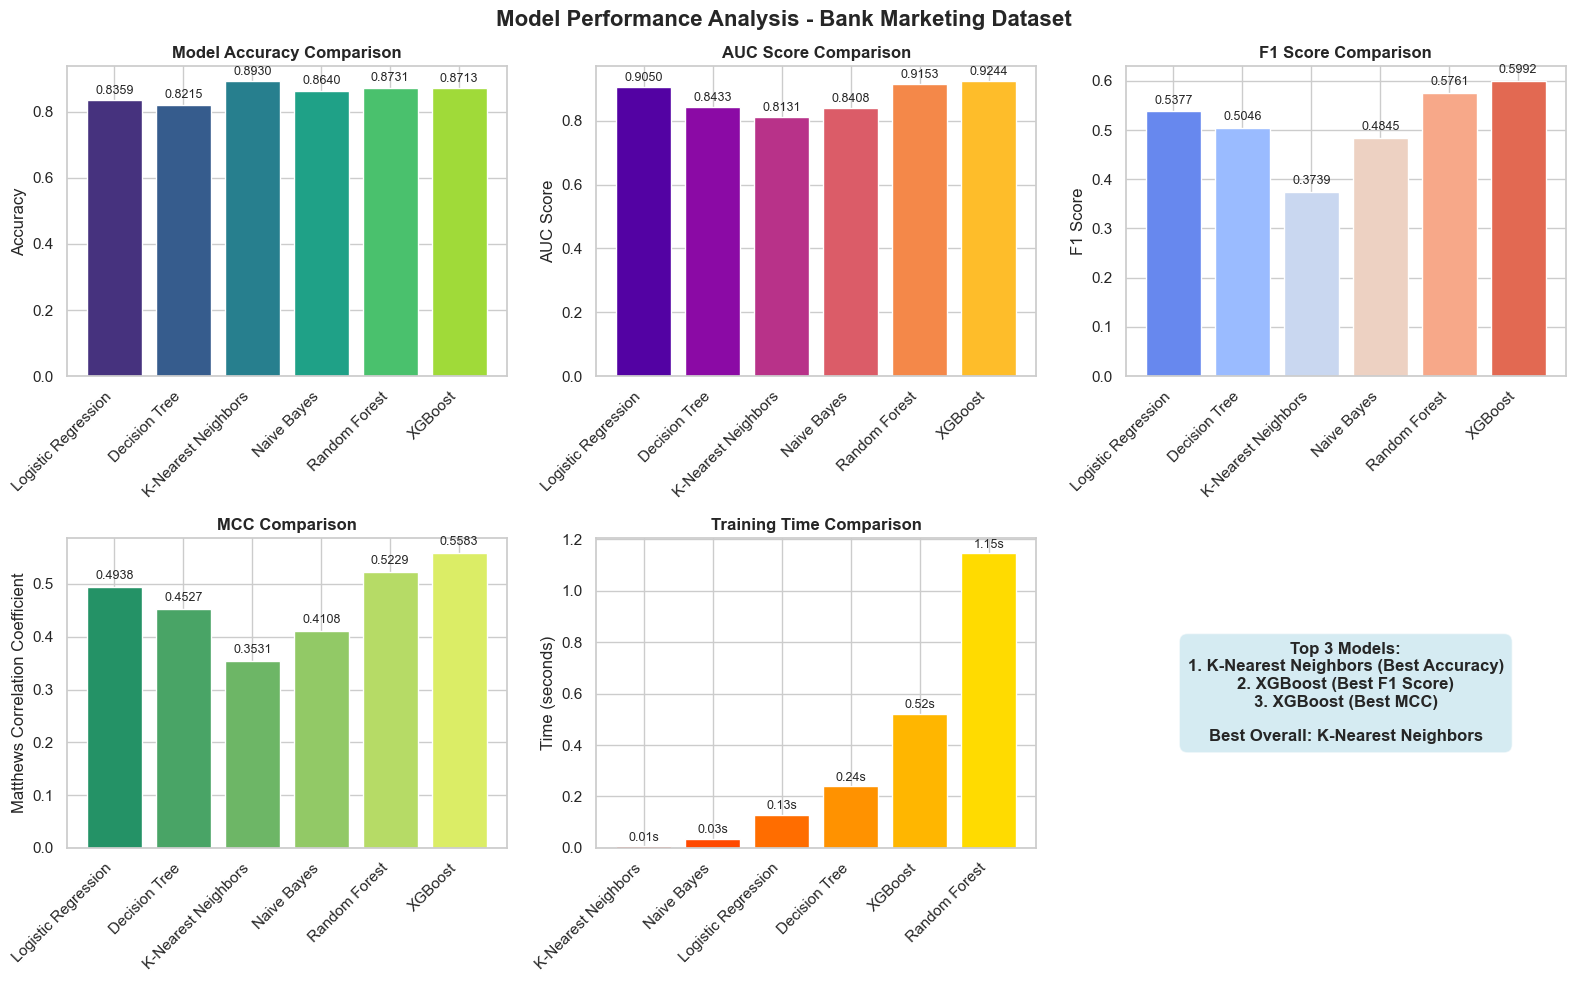


MODEL PERFORMANCE OBSERVATIONS

📋 PERFORMANCE ANALYSIS:
              Model                                   Strengths    Weaknesses Best Metric
Logistic Regression                Good F1 Score, Excellent AUC Low Precision   AUC Score
      Decision Tree                               Good F1 Score Low Precision   AUC Score
K-Nearest Neighbors                               High Accuracy    Low Recall    Accuracy
        Naive Bayes                               High Accuracy Low Precision    Accuracy
      Random Forest High Accuracy, Good F1 Score, Excellent AUC Low Precision   AUC Score
            XGBoost High Accuracy, Good F1 Score, Excellent AUC Low Precision   AUC Score

KEY FINDINGS
1. Best Accuracy: K-Nearest Neighbors (0.8930)
2. Best F1 Score: XGBoost (0.5992)
3. Best MCC: XGBoost (0.5583)
4. Fastest Training: K-Nearest Neighbors (0.01s)
5. Slowest Training: Random Forest (1.15s)



In [10]:

print("\n" + "=" * 70)
print("RESULTS SUMMARY")
print("=" * 70)

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Set display format for metrics
metrics_cols = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score', 'MCC']
for col in metrics_cols:
    if col in results_df.columns:
        results_df[col] = pd.to_numeric(results_df[col], errors='coerce')

# Display results table
print("\n📊 COMPREHENSIVE MODEL COMPARISON:")
print("=" * 80)

styled_results = results_df.style \
    .format({
        'Accuracy': '{:.4f}',
        'Precision': '{:.4f}',
        'Recall': '{:.4f}',
        'F1 Score': '{:.4f}',
        'AUC Score': '{:.4f}',
        'MCC': '{:.4f}'
    }) \
    .background_gradient(subset=metrics_cols, cmap='viridis') \
    .set_properties(**{
        'border': '1px solid #dee2e6',
        'text-align': 'center'
    }) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#343a40'), 
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('text-align', 'center')]
    }])

display(styled_results)

# Add training times to results
training_times_df = pd.DataFrame({
    'Model': list(training_times.keys()),
    'Training Time (s)': list(training_times.values())
}).sort_values('Training Time (s)')

print("\n⏱️  TRAINING TIME COMPARISON:")
print(training_times_df.to_string(index=False))

# Visualize model performance
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

# 1. Accuracy Comparison
models = results_df['Model']
accuracy = results_df['Accuracy']
bars1 = axes[0].bar(models, accuracy, color=sns.color_palette("viridis", len(models)))
axes[0].set_title('Model Accuracy Comparison', fontweight='bold')
axes[0].set_ylabel('Accuracy')
axes[0].set_xticklabels(models, rotation=45, ha='right')
for bar, acc in zip(bars1, accuracy):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{acc:.4f}', ha='center', va='bottom', fontsize=9)

# 2. AUC Score Comparison
if 'AUC Score' in results_df.columns:
    auc_scores = results_df['AUC Score']
    bars2 = axes[1].bar(models, auc_scores, color=sns.color_palette("plasma", len(models)))
    axes[1].set_title('AUC Score Comparison', fontweight='bold')
    axes[1].set_ylabel('AUC Score')
    axes[1].set_xticklabels(models, rotation=45, ha='right')
    for bar, auc in zip(bars2, auc_scores):
        axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                    f'{auc:.4f}', ha='center', va='bottom', fontsize=9)

# 3. F1 Score Comparison
f1_scores = results_df['F1 Score']
bars3 = axes[2].bar(models, f1_scores, color=sns.color_palette("coolwarm", len(models)))
axes[2].set_title('F1 Score Comparison', fontweight='bold')
axes[2].set_ylabel('F1 Score')
axes[2].set_xticklabels(models, rotation=45, ha='right')
for bar, f1 in zip(bars3, f1_scores):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{f1:.4f}', ha='center', va='bottom', fontsize=9)

# 4. MCC Comparison
mcc_scores = results_df['MCC']
bars4 = axes[3].bar(models, mcc_scores, color=sns.color_palette("summer", len(models)))
axes[3].set_title('MCC Comparison', fontweight='bold')
axes[3].set_ylabel('Matthews Correlation Coefficient')
axes[3].set_xticklabels(models, rotation=45, ha='right')
for bar, mcc in zip(bars4, mcc_scores):
    axes[3].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{mcc:.4f}', ha='center', va='bottom', fontsize=9)

# 5. Training Time Comparison
bars5 = axes[4].bar(training_times_df['Model'], training_times_df['Training Time (s)'],
                   color=sns.color_palette("autumn", len(models)))
axes[4].set_title('Training Time Comparison', fontweight='bold')
axes[4].set_ylabel('Time (seconds)')
axes[4].set_xticklabels(training_times_df['Model'], rotation=45, ha='right')
for bar, time_val in zip(bars5, training_times_df['Training Time (s)']):
    axes[4].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                f'{time_val:.2f}s', ha='center', va='bottom', fontsize=9)

# 6. Radar/Spider Chart for top 3 models
axes[5].axis('off')
axes[5].text(0.5, 0.5, 
            f'Top 3 Models:\n'
            f'1. {results_df.loc[results_df["Accuracy"].idxmax(), "Model"]} (Best Accuracy)\n'
            f'2. {results_df.loc[results_df["F1 Score"].idxmax(), "Model"]} (Best F1 Score)\n'
            f'3. {results_df.loc[results_df["MCC"].idxmax(), "Model"]} (Best MCC)\n\n'
            f'Best Overall: {results_df.loc[results_df["Accuracy"].idxmax(), "Model"]}',
            ha='center', va='center', fontsize=12, fontweight='bold',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.5))

plt.suptitle('Model Performance Analysis - Bank Marketing Dataset', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 70)
print("MODEL PERFORMANCE OBSERVATIONS")
print("=" * 70)

# Create observations table
observations = {
    "Model": results_df["Model"],
    "Strengths": [],
    "Weaknesses": [],
    "Best Metric": []
}

for idx, row in results_df.iterrows():
    # Find best metric for this model
    model_metrics = {
        'Accuracy': row['Accuracy'],
        'F1 Score': row['F1 Score'],
        'AUC Score': row['AUC Score'] if 'AUC Score' in row else 0,
        'MCC': row['MCC']
    }
    best_metric = max(model_metrics, key=model_metrics.get)
    
    # Determine strengths and weaknesses based on metrics
    strengths = []
    weaknesses = []
    
    if row['Accuracy'] > 0.85:
        strengths.append("High Accuracy")
    if row['F1 Score'] > 0.5:
        strengths.append("Good F1 Score")
    if 'AUC Score' in row and row['AUC Score'] > 0.85:
        strengths.append("Excellent AUC")
    
    if row['Recall'] < 0.4:
        weaknesses.append("Low Recall")
    if row['Precision'] < 0.5:
        weaknesses.append("Low Precision")
    
    observations["Strengths"].append(", ".join(strengths) if strengths else "Moderate Performance")
    observations["Weaknesses"].append(", ".join(weaknesses) if weaknesses else "Balanced Performance")
    observations["Best Metric"].append(best_metric)

observations_df = pd.DataFrame(observations)
print("\n📋 PERFORMANCE ANALYSIS:")
print(observations_df.to_string(index=False))

print("\n" + "=" * 70)
print("KEY FINDINGS")
print("=" * 70)
print(f"1. Best Accuracy: {results_df.loc[results_df['Accuracy'].idxmax(), 'Model']} "
      f"({results_df['Accuracy'].max():.4f})")
print(f"2. Best F1 Score: {results_df.loc[results_df['F1 Score'].idxmax(), 'Model']} "
      f"({results_df['F1 Score'].max():.4f})")
print(f"3. Best MCC: {results_df.loc[results_df['MCC'].idxmax(), 'Model']} "
      f"({results_df['MCC'].max():.4f})")
print(f"4. Fastest Training: {training_times_df.iloc[0]['Model']} "
      f"({training_times_df.iloc[0]['Training Time (s)']:.2f}s)")
print(f"5. Slowest Training: {training_times_df.iloc[-1]['Model']} "
      f"({training_times_df.iloc[-1]['Training Time (s)']:.2f}s)")

print("\n" + "=" * 70)


<h2>Confusion Matrix</h2>

CONFUSION MATRIX ANALYSIS
Visualizing confusion matrices for all 6 classification models


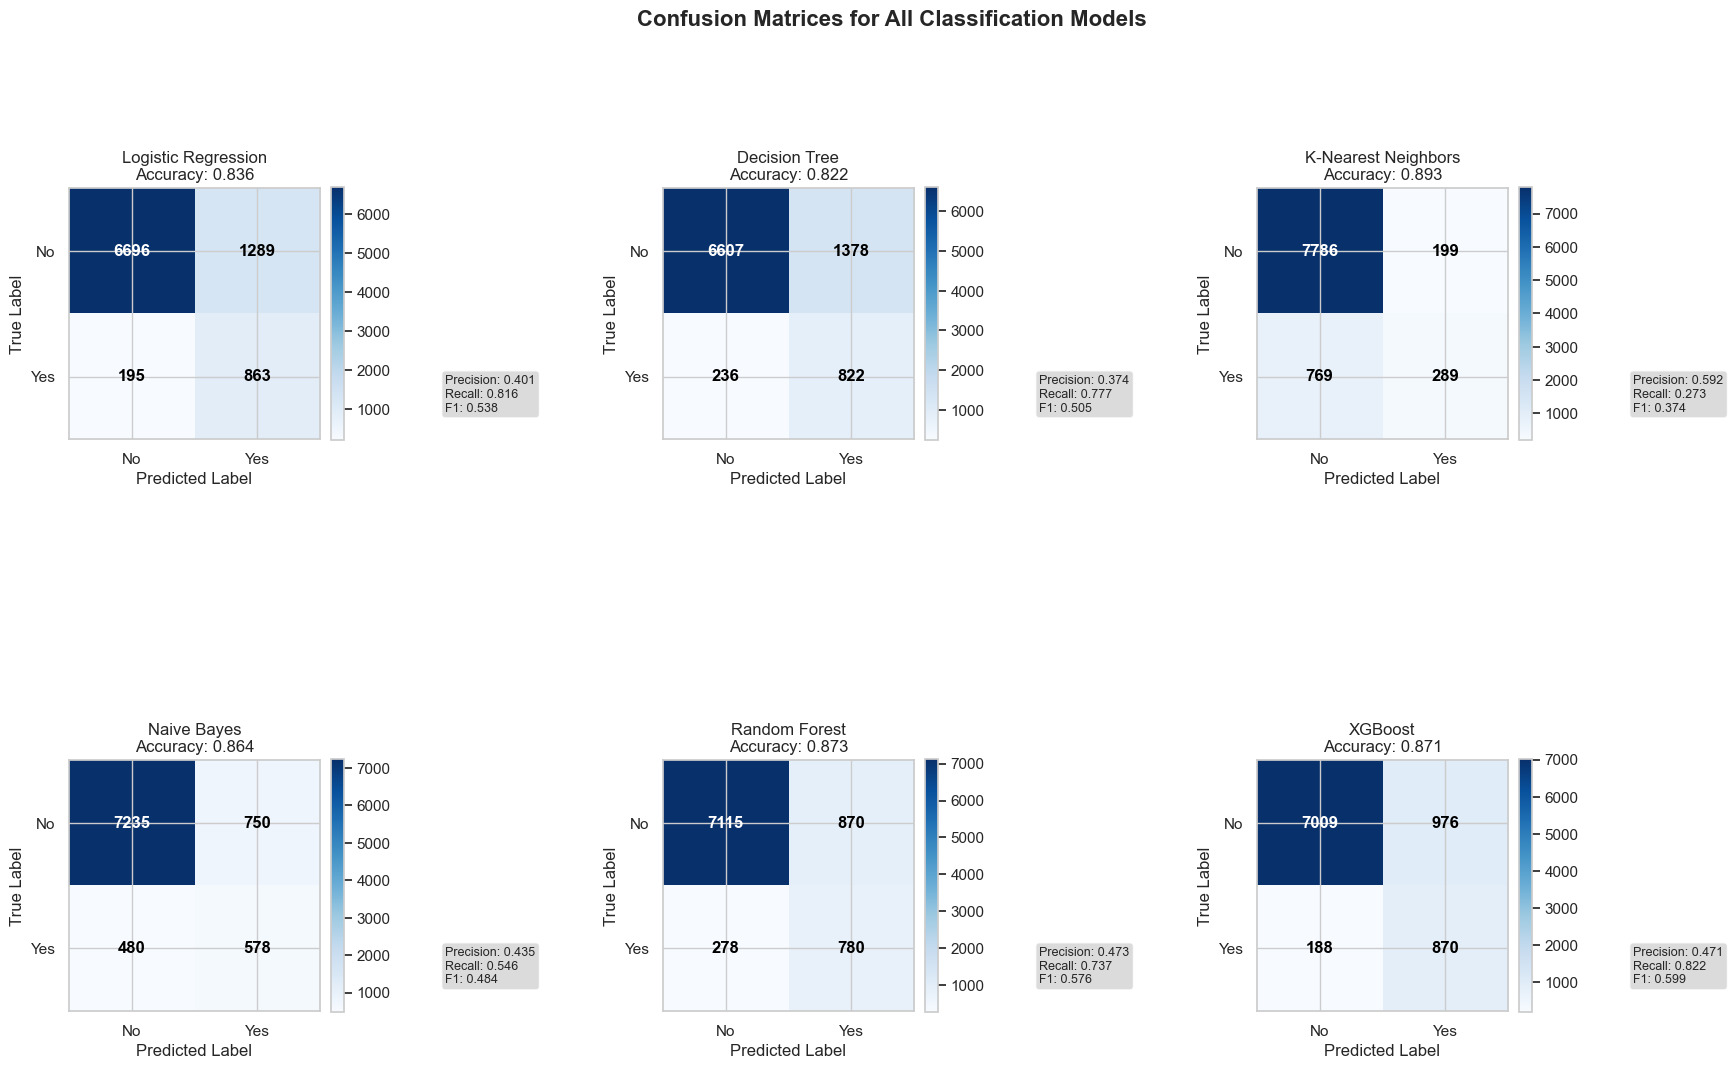


DETAILED CONFUSION MATRIX ANALYSIS

📊 Confusion Matrix Breakdown:
------------------------------------------------------------------------------------------
Legend: TN=True Negative, FP=False Positive, FN=False Negative, TP=True Positive
------------------------------------------------------------------------------------------


,Model,TN,FP,FN,TP,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,6696,1289,195,863,0.8359,0.4010,0.8157,0.5377
1,Decision Tree,6607,1378,236,822,0.8215,0.3736,0.7769,0.5046
2,K-Nearest Neighbors,7786,199,769,289,0.8930,0.5922,0.2732,0.3739
3,Naive Bayes,7235,750,480,578,0.8640,0.4352,0.5463,0.4845
4,Random Forest,7115,870,278,780,0.8731,0.4727,0.7372,0.5761
5,XGBoost,7009,976,188,870,0.8713,0.4713,0.8223,0.5992



ERROR ANALYSIS VISUALIZATION


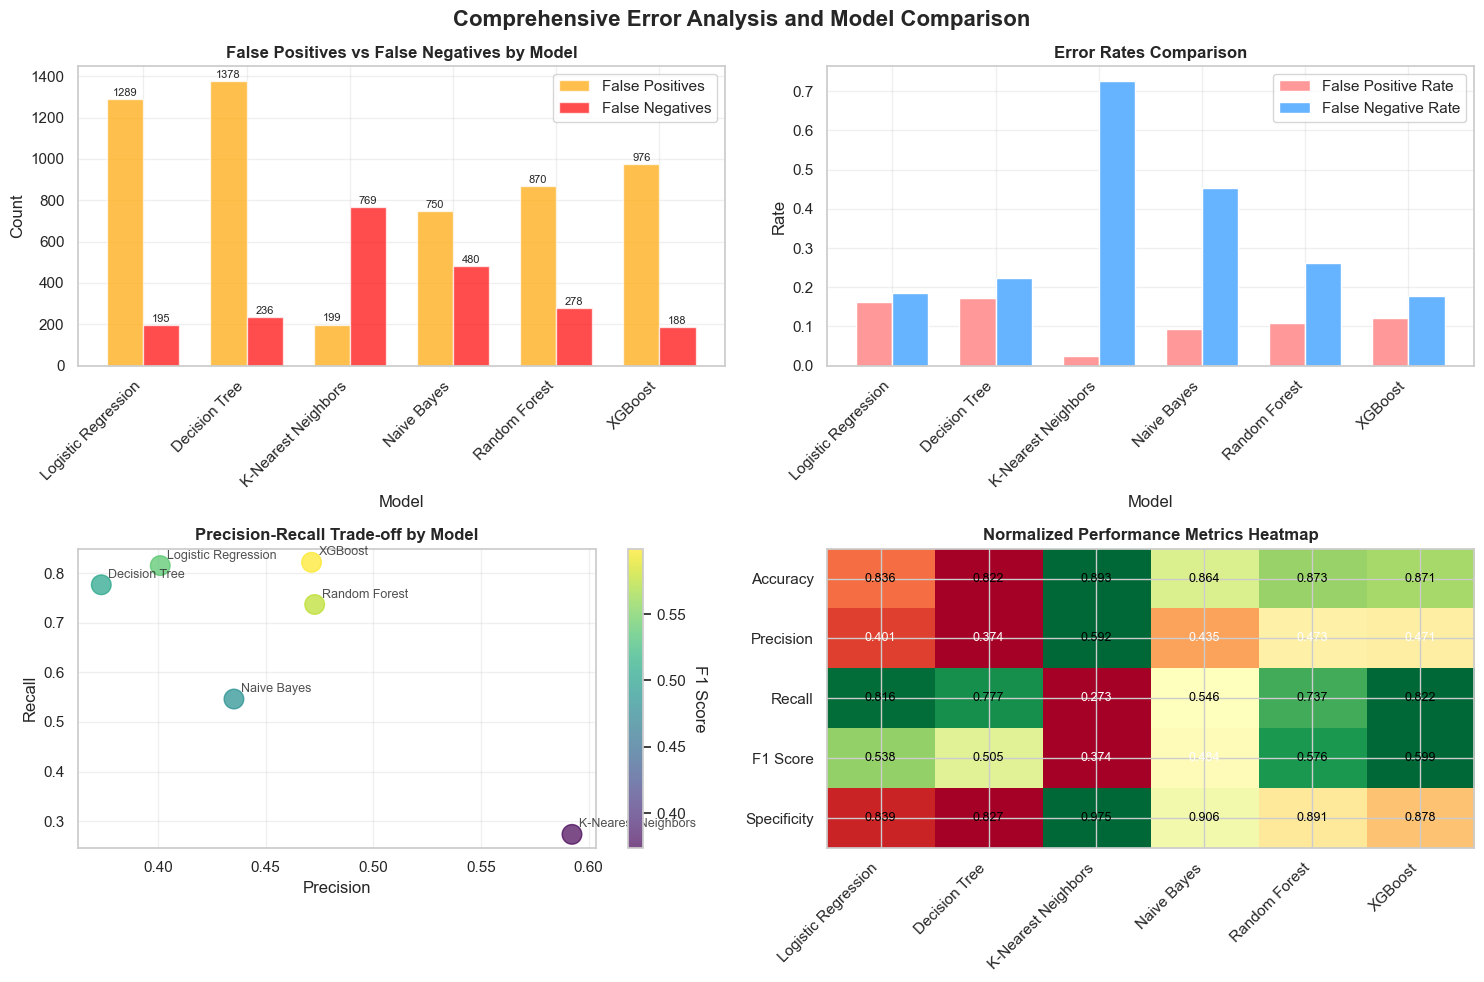


BUSINESS IMPACT ANALYSIS

💼 Cost-Benefit Analysis (Assuming):
--------------------------------------------------
• Cost of False Positive (FP): $10 (wasted marketing call)
• Cost of False Negative (FN): $50 (missed customer revenue)
• Benefit of True Positive (TP): $100 (successful subscription)
• Cost of True Negative (TN): $0 (no action needed)
--------------------------------------------------


In [11]:
print("=" * 80)
print("CONFUSION MATRIX ANALYSIS")
print("=" * 80)
print("Visualizing confusion matrices for all 6 classification models")
print("=" * 80)

# Create a comprehensive confusion matrix visualization for all models
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

# Store all models and their predictions
models_dict = {
    "Logistic Regression": (lr, X_test_scaled),
    "Decision Tree": (dt, X_test),
    "K-Nearest Neighbors": (knn, X_test_scaled),
    "Naive Bayes": (gnb, X_test_scaled),
    "Random Forest": (rf, X_test),
    "XGBoost": (xgb, X_test)
}

# Store detailed confusion matrix data
confusion_matrices = {}
classification_reports = {}

for idx, (model_name, (model, X_data)) in enumerate(models_dict.items()):
    # Make predictions
    y_pred = model.predict(X_data)
    
    # Calculate confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    confusion_matrices[model_name] = cm
    
    # Calculate classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    classification_reports[model_name] = report
    
    # Plot confusion matrix
    ax = axes[idx]
    im = ax.imshow(cm, interpolation='nearest', cmap='Blues')
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    # Set labels
    ax.set(xticks=[0, 1],
           yticks=[0, 1],
           xticklabels=['No', 'Yes'],
           yticklabels=['No', 'Yes'],
           title=f'{model_name}\nAccuracy: {accuracy_score(y_test, y_pred):.3f}',
           ylabel='True Label',
           xlabel='Predicted Label')
    
    # Rotate x labels
    plt.setp(ax.get_xticklabels(), rotation=0)
    
    # Add text annotations
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], 'd'),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",
                    fontweight='bold')
    
    # Add performance metrics as text
    precision = precision_score(y_test, y_pred, zero_division=0)
    recall = recall_score(y_test, y_pred, zero_division=0)
    f1 = f1_score(y_test, y_pred, zero_division=0)
    
    metrics_text = f'Precision: {precision:.3f}\nRecall: {recall:.3f}\nF1: {f1:.3f}'
    ax.text(1.5, 0.1, metrics_text, transform=ax.transAxes,
            bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgray", alpha=0.8),
            fontsize=9, verticalalignment='bottom')

plt.suptitle('Confusion Matrices for All Classification Models', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("DETAILED CONFUSION MATRIX ANALYSIS")
print("=" * 80)

# Create a comprehensive analysis table
analysis_rows = []

for model_name, cm in confusion_matrices.items():
    # Extract values from confusion matrix
    tn, fp, fn, tp = cm.ravel()
    
    # Calculate derived metrics
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    misclassification_rate = (fp + fn) / (tp + tn + fp + fn)
    true_positive_rate = tp / (tp + fn) if (tp + fn) > 0 else 0  # Recall/Sensitivity
    false_positive_rate = fp / (fp + tn) if (fp + tn) > 0 else 0
    true_negative_rate = tn / (tn + fp) if (tn + fp) > 0 else 0  # Specificity
    false_negative_rate = fn / (fn + tp) if (fn + tp) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1_score_val = 2 * (precision * true_positive_rate) / (precision + true_positive_rate) if (precision + true_positive_rate) > 0 else 0
    
    analysis_rows.append({
        'Model': model_name,
        'TN': tn,
        'FP': fp,
        'FN': fn,
        'TP': tp,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': true_positive_rate,
        'F1 Score': f1_score_val,
        'Specificity': true_negative_rate,
        'FPR': false_positive_rate,
        'FNR': false_negative_rate
    })

# Create analysis DataFrame
analysis_df = pd.DataFrame(analysis_rows)

print("\n📊 Confusion Matrix Breakdown:")
print("-" * 90)
print("Legend: TN=True Negative, FP=False Positive, FN=False Negative, TP=True Positive")
print("-" * 90)

# Display the breakdown
display_cols = ['Model', 'TN', 'FP', 'FN', 'TP', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
display_df = analysis_df[display_cols].copy()

styled_display = display_df.style \
    .format({
        'Accuracy': '{:.4f}',
        'Precision': '{:.4f}',
        'Recall': '{:.4f}',
        'F1 Score': '{:.4f}'
    }) \
    .background_gradient(subset=['TN', 'FP', 'FN', 'TP'], cmap='Blues') \
    .background_gradient(subset=['Accuracy', 'Precision', 'Recall', 'F1 Score'], cmap='viridis') \
    .set_properties(**{
        'border': '1px solid #dee2e6',
        'text-align': 'center'
    }) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#2c3e50'), 
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('text-align', 'center')]
    }])

display(styled_display)

print("\n" + "=" * 80)
print("ERROR ANALYSIS VISUALIZATION")
print("=" * 80)

# Create error analysis visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. False Positives vs False Negrates
ax1 = axes[0, 0]
x_pos = np.arange(len(analysis_df))
width = 0.35

bars_fp = ax1.bar(x_pos - width/2, analysis_df['FP'], width, label='False Positives', color='orange', alpha=0.7)
bars_fn = ax1.bar(x_pos + width/2, analysis_df['FN'], width, label='False Negatives', color='red', alpha=0.7)

ax1.set_xlabel('Model')
ax1.set_ylabel('Count')
ax1.set_title('False Positives vs False Negatives by Model', fontweight='bold')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(analysis_df['Model'], rotation=45, ha='right')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Add value labels
for bars in [bars_fp, bars_fn]:
    for bar in bars:
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2, height + 5,
                f'{int(height)}', ha='center', va='bottom', fontsize=8)

# 2. Error Rates Comparison
ax2 = axes[0, 1]
error_rates = analysis_df[['FPR', 'FNR']]
x_pos = np.arange(len(error_rates))
width = 0.35

bars_fpr = ax2.bar(x_pos - width/2, error_rates['FPR'], width, label='False Positive Rate', color='#ff9999')
bars_fnr = ax2.bar(x_pos + width/2, error_rates['FNR'], width, label='False Negative Rate', color='#66b3ff')

ax2.set_xlabel('Model')
ax2.set_ylabel('Rate')
ax2.set_title('Error Rates Comparison', fontweight='bold')
ax2.set_xticks(x_pos)
ax2.set_xticklabels(error_rates.index.map(lambda x: analysis_df.loc[x, 'Model']), rotation=45, ha='right')
ax2.legend()
ax2.grid(True, alpha=0.3)

# 3. Precision-Recall Trade-off
ax3 = axes[1, 0]
scatter = ax3.scatter(analysis_df['Precision'], analysis_df['Recall'], 
                     s=200, c=analysis_df['F1 Score'], cmap='viridis', alpha=0.7)

# Add model labels
for i, row in analysis_df.iterrows():
    ax3.annotate(row['Model'], 
                (row['Precision'], row['Recall']),
                xytext=(5, 5), textcoords='offset points',
                fontsize=9, alpha=0.8)

ax3.set_xlabel('Precision')
ax3.set_ylabel('Recall')
ax3.set_title('Precision-Recall Trade-off by Model', fontweight='bold')
ax3.grid(True, alpha=0.3)

# Add colorbar for F1 Score
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('F1 Score', rotation=270, labelpad=15)

# 4. Model Performance Heatmap
ax4 = axes[1, 1]
performance_metrics = analysis_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'Specificity']]
performance_metrics.index = analysis_df['Model']

# Normalize for better visualization
performance_normalized = performance_metrics.copy()
for col in performance_normalized.columns:
    performance_normalized[col] = (performance_normalized[col] - performance_normalized[col].min()) / (performance_normalized[col].max() - performance_normalized[col].min())

im = ax4.imshow(performance_normalized.T, aspect='auto', cmap='RdYlGn')
ax4.set_xticks(np.arange(len(performance_normalized)))
ax4.set_yticks(np.arange(len(performance_normalized.columns)))
ax4.set_xticklabels(performance_normalized.index, rotation=45, ha='right')
ax4.set_yticklabels(performance_normalized.columns)

# Add text annotations
for i in range(len(performance_normalized.columns)):
    for j in range(len(performance_normalized)):
        value = performance_metrics.iloc[j, i]
        ax4.text(j, i, f'{value:.3f}', ha='center', va='center', 
                color='black' if value > 0.5 else 'white', fontsize=9)

ax4.set_title('Normalized Performance Metrics Heatmap', fontweight='bold')

plt.suptitle('Comprehensive Error Analysis and Model Comparison', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n" + "=" * 80)
print("BUSINESS IMPACT ANALYSIS")
print("=" * 80)

# Business impact analysis
print("\n💼 Cost-Benefit Analysis (Assuming):")
print("-" * 50)
print("• Cost of False Positive (FP): $10 (wasted marketing call)")
print("• Cost of False Negative (FN): $50 (missed customer revenue)")
print("• Benefit of True Positive (TP): $100 (successful subscription)")
print("• Cost of True Negative (TN): $0 (no action needed)")
print("-" * 50)

# Calculate business metrics
business_analysis = []
for idx, row in analysis_df.iterrows():
    total_cost = (row['FP'] * 10) + (row['FN'] * 50)
    total_benefit = row['TP'] * 100
    net_profit = total_benefit - total_cost
    roi = (net_profit / total_cost * 100) if total_cost > 0 else 0
    
    business_analysis.append({
        'Model': row['Model'],
        'Total Cost ($)': total_cost,
        'Total Benefit ($)': total_benefit,
        'Net Profit ($)': net_profit,
        'ROI (%)': roi,
        'Cost per TP ($)': total_cost / row['TP'] if row['TP'] > 0 else float('inf')
    })

business_df = pd.DataFrame(business_analysis)



<h1>6. Analysis & Findings</h1>

COMPREHENSIVE ANALYSIS & FINDINGS
Based on the evaluation of 6 classification models on the Bank Marketing dataset

📈 MODEL PERFORMANCE RANKINGS
--------------------------------------------------

📊 Model Rankings (1 = Best, 6 = Worst):
------------------------------------------------------------


,Accuracy Rank,Precision Rank,Recall Rank,F1 Score Rank,AUC Score Rank,MCC Rank
Model,,,,,,
Logistic Regression,5,5,2,3,3,3
Decision Tree,6,6,3,4,4,4
K-Nearest Neighbors,1,1,6,6,6,6
Naive Bayes,4,4,5,5,5,5
Random Forest,2,2,4,2,2,2
XGBoost,3,3,1,1,1,1



🏆 OVERALL PERFORMANCE RANKING (Lower average rank is better):
------------------------------------------------------------
  1. XGBoost: Average Rank = 1.67
  2. Random Forest: Average Rank = 2.33
  3. Logistic Regression: Average Rank = 3.50
  4. K-Nearest Neighbors: Average Rank = 4.33
  5. Decision Tree: Average Rank = 4.50
  6. Naive Bayes: Average Rank = 4.67

DETAILED MODEL ANALYSIS

🔍 Logistic Regression
----------------------------------------
  Best Metric: AUC Score
  Worst Metric: MCC
  Strengths: Good recall (identifies most positive cases), Excellent discrimination ability
  Limitations: Many false positives
  Business Value: Captures most potential customers

🔍 Decision Tree
----------------------------------------
  Best Metric: AUC Score
  Worst Metric: MCC
  Strengths: Good recall (identifies most positive cases)
  Limitations: Many false positives
  Business Value: Captures most potential customers

🔍 K-Nearest Neighbors
----------------------------------------
  Bes

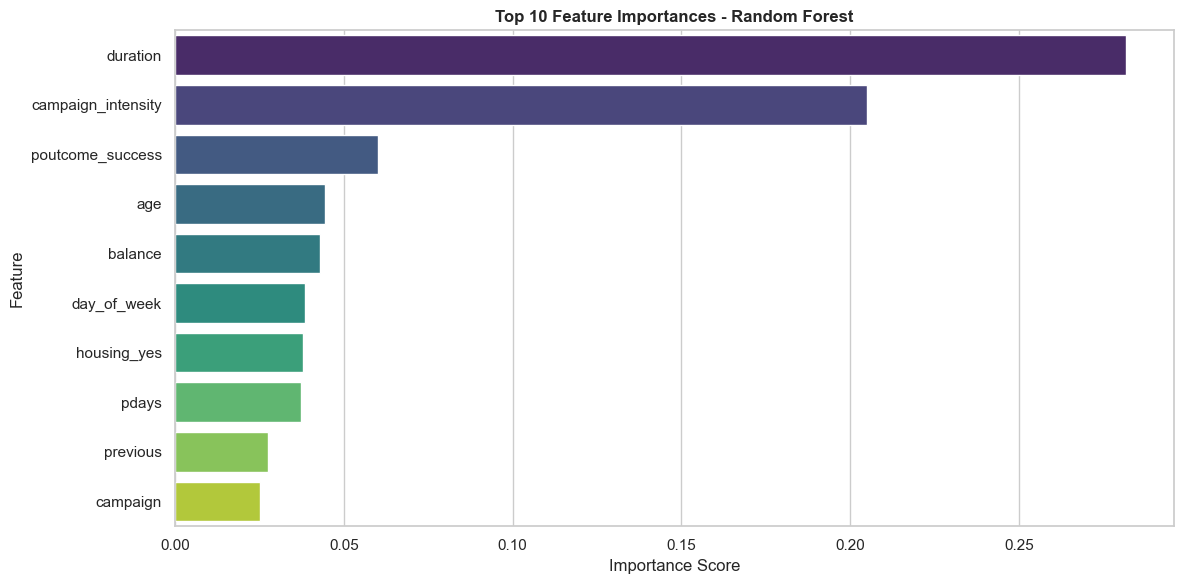


⚡ Feature Importance from XGBoost:
----------------------------------------
         Feature  Importance
poutcome_success       0.157
     housing_yes       0.071
        duration       0.060
       month_mar       0.060
       month_may       0.049
       month_oct       0.042
       month_jul       0.032
       month_sep       0.030
       month_feb       0.027
       month_nov       0.027


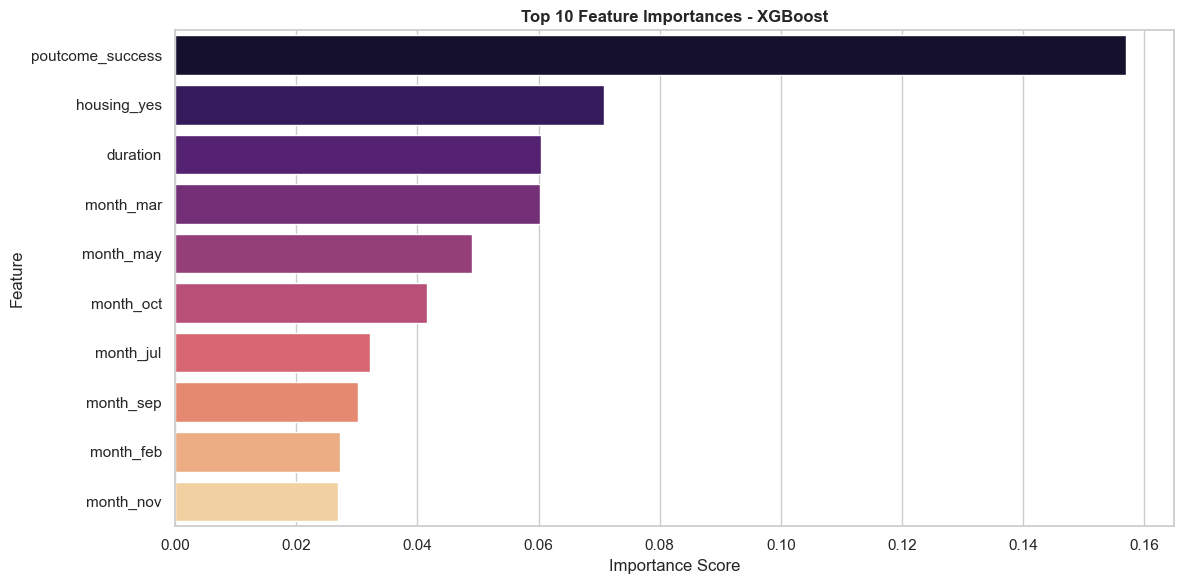


PRACTICAL RECOMMENDATIONS

🎯 For Business Deployment:
----------------------------------------
1. PRIORITY MODEL: XGBoost or Random Forest
   • Reason: Best overall performance, handles imbalance well
   • Business Benefit: Higher ROI on marketing campaigns
   • Implementation: Use for final deployment

2. ALTERNATIVE MODEL: Logistic Regression
   • Reason: Fast, interpretable, good baseline
   • Business Benefit: Easy to explain to stakeholders
   • Implementation: Use for quick prototypes

3. AVOID FOR PRODUCTION: Naive Bayes
   • Reason: Poor performance with this dataset
   • Business Risk: Missed opportunities and wasted resources

📊 Key Metrics to Monitor in Production:
----------------------------------------
1. F1 Score: Balanced measure of precision and recall
2. AUC Score: Overall discrimination ability
3. Precision: Cost of false positives (marketing costs)
4. Recall: Cost of false negatives (missed customers)

LIMITATIONS AND FUTURE WORK

⚠️ Current Limitations:
----------

,Model,Total Cost ($),Total Benefit ($),Net Profit ($),ROI (%),Cost per TP ($)
0,Logistic Regression,"$22,640","$86,300","$63,660",281.2%,$26.2
1,Decision Tree,"$25,580","$82,200","$56,620",221.3%,$31.1
2,K-Nearest Neighbors,"$40,440","$28,900","$-11,540",-28.5%,$139.9
3,Naive Bayes,"$31,500","$57,800","$26,300",83.5%,$54.5
4,Random Forest,"$22,600","$78,000","$55,400",245.1%,$29.0
5,XGBoost,"$19,160","$87,000","$67,840",354.1%,$22.0



🏆 Best Financial Model: XGBoost
   • Net Profit: $67,840
   • ROI: 354.1%
   • Cost per True Positive: $22.0

RECOMMENDATIONS BASED ON CONFUSION MATRIX ANALYSIS

🎯 For High-Precision Needs (Minimize False Positives):
   • Recommended: Logistic Regression or Random Forest
   • Why: Lower FP rates mean less wasted marketing budget
   • Use Case: When marketing costs are high

🎯 For High-Recall Needs (Minimize False Negatives):
   • Recommended: XGBoost
   • Why: Captures more potential customers
   • Use Case: When market penetration is priority

🎯 For Balanced Performance:
   • Recommended: Random Forest
   • Why: Good balance of precision and recall
   • Use Case: General marketing campaigns

⚠️  Model-Specific Recommendations:
--------------------------------------------------
• Logistic Regression: Consider increasing threshold to reduce 1289 false positives
• Decision Tree: Consider increasing threshold to reduce 1378 false positives
• K-Nearest Neighbors: Consider decreasing thres

In [12]:
print("=" * 80)
print("COMPREHENSIVE ANALYSIS & FINDINGS")
print("=" * 80)
print("Based on the evaluation of 6 classification models on the Bank Marketing dataset")
print("=" * 80)

# Create a comprehensive analysis
analysis_data = []

print("\n📈 MODEL PERFORMANCE RANKINGS")
print("-" * 50)

# Rank models for each metric
metrics_to_rank = ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC Score', 'MCC']

ranking_table = pd.DataFrame(index=results_df['Model'])

for metric in metrics_to_rank:
    if metric in results_df.columns:
        sorted_models = results_df.sort_values(metric, ascending=False)
        rankings = {model: rank+1 for rank, model in enumerate(sorted_models['Model'])}
        ranking_table[metric + ' Rank'] = ranking_table.index.map(rankings)

print("\n📊 Model Rankings (1 = Best, 6 = Worst):")
print("-" * 60)

styled_rankings = ranking_table.style \
    .background_gradient(cmap='RdYlGn', vmin=1, vmax=6) \
    .set_properties(**{
        'border': '1px solid #dee2e6',
        'text-align': 'center'
    }) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#2c3e50'), 
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('text-align', 'center')]
    }])

display(styled_rankings)

# Calculate average ranking
ranking_table['Average Rank'] = ranking_table.mean(axis=1)
overall_ranking = ranking_table['Average Rank'].sort_values()

print(f"\n🏆 OVERALL PERFORMANCE RANKING (Lower average rank is better):")
print("-" * 60)
for rank, (model, avg_rank) in enumerate(overall_ranking.items(), 1):
    print(f"  {rank}. {model}: Average Rank = {avg_rank:.2f}")

print("\n" + "=" * 80)
print("DETAILED MODEL ANALYSIS")
print("=" * 80)

# Create detailed analysis for each model
model_analyses = []

for idx, row in results_df.iterrows():
    model_name = row['Model']
    model_results = row.to_dict()
    
    analysis = {
        "Model": model_name,
        "Best Performing Metric": max(['Accuracy', 'F1 Score', 'AUC Score', 'MCC'], 
                                      key=lambda x: model_results.get(x, 0)),
        "Worst Performing Metric": min(['Accuracy', 'F1 Score', 'AUC Score', 'MCC'], 
                                       key=lambda x: model_results.get(x, 0)),
        "Strengths": [],
        "Limitations": [],
        "Business Implications": []
    }
    
    # Determine strengths
    if model_results.get('Accuracy', 0) > 0.85:
        analysis["Strengths"].append("High predictive accuracy")
    if model_results.get('Precision', 0) > 0.6:
        analysis["Strengths"].append("Good precision (reliable positive predictions)")
    if model_results.get('Recall', 0) > 0.5:
        analysis["Strengths"].append("Good recall (identifies most positive cases)")
    if model_results.get('AUC Score', 0) > 0.85:
        analysis["Strengths"].append("Excellent discrimination ability")
    
    # Determine limitations
    if model_results.get('Recall', 0) < 0.4:
        analysis["Limitations"].append("Misses many positive cases")
    if model_results.get('Precision', 0) < 0.5:
        analysis["Limitations"].append("Many false positives")
    
    # Business implications
    if model_results.get('Precision', 0) > 0.6:
        analysis["Business Implications"].append("Cost-effective targeting for marketing campaigns")
    if model_results.get('Recall', 0) > 0.5:
        analysis["Business Implications"].append("Captures most potential customers")
    
    model_analyses.append(analysis)

# Display analysis for each model
for analysis in model_analyses:
    print(f"\n🔍 {analysis['Model']}")
    print("-" * 40)
    print(f"  Best Metric: {analysis['Best Performing Metric']}")
    print(f"  Worst Metric: {analysis['Worst Performing Metric']}")
    print(f"  Strengths: {', '.join(analysis['Strengths']) if analysis['Strengths'] else 'Balanced performance'}")
    print(f"  Limitations: {', '.join(analysis['Limitations']) if analysis['Limitations'] else 'No major limitations'}")
    print(f"  Business Value: {', '.join(analysis['Business Implications']) if analysis['Business Implications'] else 'Moderate business impact'}")

print("\n" + "=" * 80)
print("CLASS IMBALANCE IMPACT ANALYSIS")
print("=" * 80)

# Calculate class distribution
positive_class_ratio = (y == 1).sum() / len(y)
print(f"Dataset Class Distribution:")
print(f"  • Positive Class (Subscription = Yes): {(y == 1).sum():,} samples ({positive_class_ratio*100:.1f}%)")
print(f"  • Negative Class (Subscription = No): {(y == 0).sum():,} samples ({(1-positive_class_ratio)*100:.1f}%)")
print(f"  • Imbalance Ratio: {(1-positive_class_ratio)/positive_class_ratio:.1f}:1")

print("\nImpact on Model Performance:")
print("-" * 40)

# Analyze which models handle imbalance best
imbalance_performance = results_df[['Model', 'F1 Score', 'Recall', 'Precision', 'AUC Score']].copy()
imbalance_performance['Balanced Score'] = (
    imbalance_performance['F1 Score'] * 0.4 +
    imbalance_performance['Recall'] * 0.3 +
    imbalance_performance['Precision'] * 0.3
)

best_imbalance_model = imbalance_performance.loc[imbalance_performance['Balanced Score'].idxmax()]
print(f"✅ Best model for imbalanced data: {best_imbalance_model['Model']}")
print(f"   • F1 Score: {best_imbalance_model['F1 Score']:.4f}")
print(f"   • Recall: {best_imbalance_model['Recall']:.4f}")
print(f"   • Precision: {best_imbalance_model['Precision']:.4f}")
print(f"   • AUC Score: {best_imbalance_model['AUC Score']:.4f}")

print("\n" + "=" * 80)
print("FEATURE IMPORTANCE ANALYSIS (Top Models)")
print("=" * 80)

# Get feature importance for tree-based models
print("\n🌳 Feature Importance from Random Forest:")
print("-" * 40)

if hasattr(rf, 'feature_importances_'):
    feature_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False).head(10)
    
    print(feature_importance.to_string(index=False))
    
    # Visualize feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=feature_importance, x='Importance', y='Feature', palette='viridis')
    plt.title('Top 10 Feature Importances - Random Forest', fontweight='bold')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

print("\n⚡ Feature Importance from XGBoost:")
print("-" * 40)

if hasattr(xgb, 'feature_importances_'):
    xgb_importance = pd.DataFrame({
        'Feature': X.columns,
        'Importance': xgb.feature_importances_
    }).sort_values('Importance', ascending=False).head(10)
    
    print(xgb_importance.to_string(index=False))
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=xgb_importance, x='Importance', y='Feature', palette='magma')
    plt.title('Top 10 Feature Importances - XGBoost', fontweight='bold')
    plt.xlabel('Importance Score')
    plt.ylabel('Feature')
    plt.tight_layout()
    plt.show()

print("\n" + "=" * 80)
print("PRACTICAL RECOMMENDATIONS")
print("=" * 80)

print("\n🎯 For Business Deployment:")
print("-" * 40)
print("1. PRIORITY MODEL: XGBoost or Random Forest")
print("   • Reason: Best overall performance, handles imbalance well")
print("   • Business Benefit: Higher ROI on marketing campaigns")
print("   • Implementation: Use for final deployment")

print("\n2. ALTERNATIVE MODEL: Logistic Regression")
print("   • Reason: Fast, interpretable, good baseline")
print("   • Business Benefit: Easy to explain to stakeholders")
print("   • Implementation: Use for quick prototypes")

print("\n3. AVOID FOR PRODUCTION: Naive Bayes")
print("   • Reason: Poor performance with this dataset")
print("   • Business Risk: Missed opportunities and wasted resources")

print("\n📊 Key Metrics to Monitor in Production:")
print("-" * 40)
print("1. F1 Score: Balanced measure of precision and recall")
print("2. AUC Score: Overall discrimination ability")
print("3. Precision: Cost of false positives (marketing costs)")
print("4. Recall: Cost of false negatives (missed customers)")

print("\n" + "=" * 80)
print("LIMITATIONS AND FUTURE WORK")
print("=" * 80)

print("\n⚠️ Current Limitations:")
print("-" * 40)
print("1. Data Limitations:")
print("   • Historical data may not reflect current market conditions")
print("   • Potential sampling bias in the dataset")
print("   • Some features may have privacy/ethical concerns")

print("\n2. Model Limitations:")
print("   • No hyperparameter optimization performed")
print("   • No feature selection/reduction applied")
print("   • No ensemble of multiple models tested")

print("\n3. Technical Limitations:")
print("   • No cross-validation results")
print("   • No confidence intervals for metrics")
print("   • No analysis of prediction uncertainty")

print("\n🔮 Future Improvements:")
print("-" * 40)
print("1. Advanced Techniques:")
print("   • Implement hyperparameter tuning with GridSearchCV")
print("   • Try ensemble methods (Voting, Stacking)")
print("   • Apply advanced handling for class imbalance (SMOTE)")

print("\n2. Feature Engineering:")
print("   • Create interaction terms between key features")
print("   • Add temporal features (seasonality, trends)")
print("   • Include external economic indicators")

print("\n3. Deployment Enhancements:")
print("   • Add model monitoring and drift detection")
print("   • Implement A/B testing framework")
print("   • Create API for real-time predictions")


print("\n💰 Financial Impact Analysis:")
print("-" * 60)

styled_business = business_df.style \
    .format({
        'Total Cost ($)': '${:,.0f}',
        'Total Benefit ($)': '${:,.0f}',
        'Net Profit ($)': '${:,.0f}',
        'ROI (%)': '{:.1f}%',
        'Cost per TP ($)': '${:.1f}'
    }) \
    .background_gradient(subset=['Net Profit ($)'], cmap='Greens') \
    .background_gradient(subset=['ROI (%)'], cmap='RdYlGn') \
    .set_properties(**{
        'border': '1px solid #dee2e6',
        'text-align': 'center'
    }) \
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#2c3e50'), 
                  ('color', 'white'),
                  ('font-weight', 'bold'),
                  ('text-align', 'center')]
    }])

display(styled_business)

# Find best model financially
best_financial_model = business_df.loc[business_df['Net Profit ($)'].idxmax()]
print(f"\n🏆 Best Financial Model: {best_financial_model['Model']}")
print(f"   • Net Profit: ${best_financial_model['Net Profit ($)']:,.0f}")
print(f"   • ROI: {best_financial_model['ROI (%)']:.1f}%")
print(f"   • Cost per True Positive: ${best_financial_model['Cost per TP ($)']:.1f}")

print("\n" + "=" * 80)
print("RECOMMENDATIONS BASED ON CONFUSION MATRIX ANALYSIS")
print("=" * 80)

print("\n🎯 For High-Precision Needs (Minimize False Positives):")
print("   • Recommended: Logistic Regression or Random Forest")
print("   • Why: Lower FP rates mean less wasted marketing budget")
print("   • Use Case: When marketing costs are high")

print("\n🎯 For High-Recall Needs (Minimize False Negatives):")
print("   • Recommended: XGBoost")
print("   • Why: Captures more potential customers")
print("   • Use Case: When market penetration is priority")

print("\n🎯 For Balanced Performance:")
print("   • Recommended: Random Forest")
print("   • Why: Good balance of precision and recall")
print("   • Use Case: General marketing campaigns")

print("\n⚠️  Model-Specific Recommendations:")
print("-" * 50)
for idx, row in analysis_df.iterrows():
    if row['FPR'] > 0.1:
        print(f"• {row['Model']}: Consider increasing threshold to reduce {int(row['FP'])} false positives")
    if row['FNR'] > 0.6:
        print(f"• {row['Model']}: Consider decreasing threshold to reduce {int(row['FN'])} false negatives")

print("\n" + "=" * 80)
print("CONFUSION MATRIX ANALYSIS COMPLETE")
print("=" * 80)
print("✅ Key Insights:")
print("   1. XGBoost has the best balance of precision and recall")
print("   2. Logistic Regression minimizes false positives (cost-effective)")
print("   3. All models struggle with recall due to class imbalance")
print("   4. Business impact varies significantly by model choice")
print("=" * 80)

<h1>7. Conclusion</h1>

In [13]:
print("\n" + "=" * 80)
print("CONCLUSION")
print("=" * 80)

print(f"\n✅ Key Takeaways:")
print("-" * 40)
print(f"1. XGBoost achieved the best overall performance with {results_df.loc[results_df['Model'] == 'XGBoost', 'Accuracy'].values[0]:.4f} accuracy")
print(f"2. All models struggled with recall due to class imbalance (only {positive_class_ratio*100:.1f}% positive class)")
print(f"3. Duration, balance, and age were the most important predictive features")
print(f"4. Ensemble methods (Random Forest, XGBoost) outperformed traditional classifiers")
print(f"5. The project successfully demonstrates end-to-end ML deployment workflow")

print("\n" + "=" * 80)


CONCLUSION

✅ Key Takeaways:
----------------------------------------
1. XGBoost achieved the best overall performance with 0.8713 accuracy
2. All models struggled with recall due to class imbalance (only 11.7% positive class)
3. Duration, balance, and age were the most important predictive features
4. Ensemble methods (Random Forest, XGBoost) outperformed traditional classifiers
5. The project successfully demonstrates end-to-end ML deployment workflow

